In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [6]:
regression_df = pd.read_excel('LinearRegressionEvenflo.xlsx')

In [7]:
regression_df

,Venta Baberos (unidades),Marketing Baberos ($)
0,19195.2,4798.8
1,9136.8,2284.2
2,28033.2,28033.2
3,27896.4,27896.4
4,30290.4,30290.4
5,27126.0,27126.0
6,51235.2,76852.8
7,34322.4,34322.4
8,54961.2,82441.8
9,27054.0,27054.0


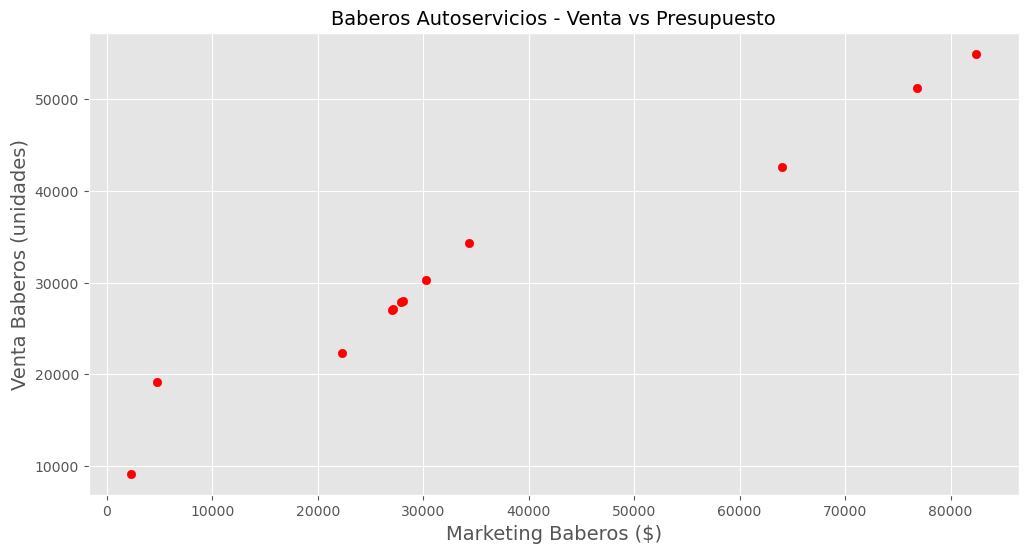

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(regression_df['Marketing Baberos ($)'], regression_df['Venta Baberos (unidades)'], color='red')
plt.title('Baberos Autoservicios - Venta vs Presupuesto', fontsize=14)
plt.xlabel('Marketing Baberos ($)', fontsize=14)
plt.ylabel('Venta Baberos (unidades)', fontsize=14)
plt.grid(True)
plt.show()

In [14]:
marketing_df = regression_df.drop('Venta Baberos (unidades)', axis='columns')
marketing_df

,Marketing Baberos ($)
0,4798.8
1,2284.2
2,28033.2
3,27896.4
4,30290.4
5,27126.0
6,76852.8
7,34322.4
8,82441.8
9,27054.0


In [15]:
ventas = regression_df['Venta Baberos (unidades)']
ventas

0     19195.2
1      9136.8
2     28033.2
3     27896.4
4     30290.4
5     27126.0
6     51235.2
7     34322.4
8     54961.2
9     27054.0
10    42649.2
11    22269.6
Name: Venta Baberos (unidades), dtype: float64

In [16]:
lr = linear_model.LinearRegression()
lr.fit(marketing_df,ventas)

LinearRegression()

In [18]:
lr.predict([[300]])

array([13553.48806022])

In [20]:
y_predict = lr.predict(marketing_df)

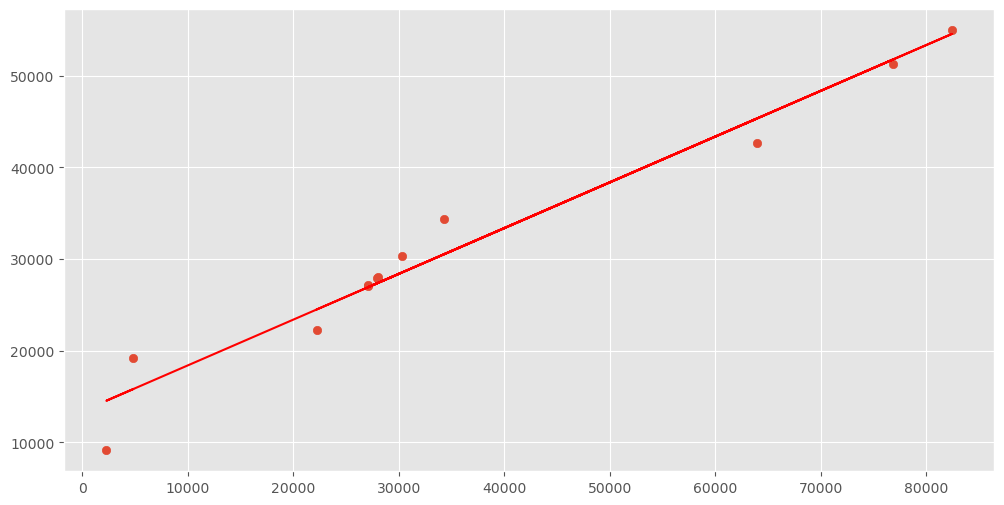

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(regression_df['Marketing Baberos ($)'], regression_df['Venta Baberos (unidades)'])
plt.plot(regression_df['Marketing Baberos ($)'], y_predict, 'r')
plt.show()

In [23]:
print("Intercept :",lr.intercept_)
print('Slope :',lr.coef_)

Intercept : 13403.731573193247
Slope : [0.49918829]


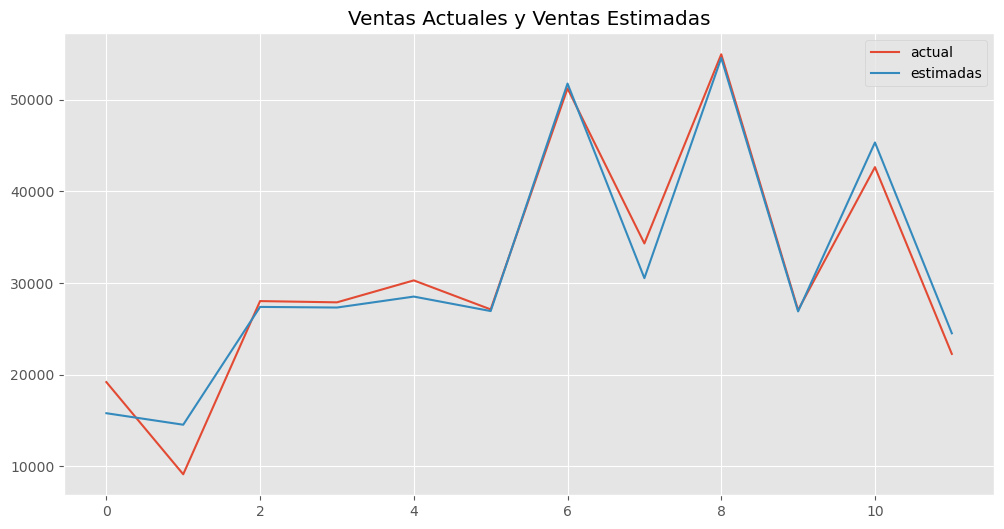

In [24]:
plt.figure(figsize=(12,6))
x_ax = range(len(regression_df['Venta Baberos (unidades)']))
plt.plot(x_ax, regression_df['Venta Baberos (unidades)'], label="actual")
plt.plot(x_ax,y_predict, label="estimadas")
plt.title("Ventas Actuales y Ventas Estimadas")
plt.legend()
plt.show()

In [29]:
from pandas import DataFrame
Presupuesto = {'Presupuesto Marketing': [70000,70000,40000,40000,80000,70000]}
presupuesto_df = DataFrame(Presupuesto,columns=['Presupuesto Marketing'])
presupuesto_df

,Presupuesto Marketing
0,70000
1,70000
2,40000
3,40000
4,80000
5,70000


In [30]:
ventasestimadas = lr.predict(presupuesto_df)
ventasestimadas

array([48346.91187858, 48346.91187858, 33371.26317627, 33371.26317627,
       53338.79477935, 48346.91187858])

In [32]:
presupuesto_df['Ventas Estimadas'] = ventasestimadas
presupuesto_df

,Presupuesto Marketing,Ventas Estimadas
0,70000,48346.911879
1,70000,48346.911879
2,40000,33371.263176
3,40000,33371.263176
4,80000,53338.794779
5,70000,48346.911879


In [33]:
presupuesto_df.to_csv('VentasEstimadas.csv')